## Using the Transformers Library from Hugging Face

You can use pre-made pipelines for your projects by using Hugging Face models!

In [ ]:
from transformers import pipeline

# Initialize the translation pipeline
translator = pipeline("translation_en_to_de")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
english_text = "This is a test translation from English to German."
translated_text = translator(english_text)

print("Translated text:", translated_text[0]['translation_text'])

Translated text: Dies ist eine Testübersetzung von Englisch ins Deutsche.


## Image Classification with Vision Transformers

In [6]:
import torch
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [7]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/American_Eskimo_Dog.jpg/360px-American_Eskimo_Dog.jpg -O sample.jpg

--2024-01-04 11:34:29--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/American_Eskimo_Dog.jpg/360px-American_Eskimo_Dog.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36760 (36K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  35.90K  --.-KB/s    in 0.02s   

2024-01-04 11:34:30 (1.75 MB/s) - ‘sample.jpg’ saved [36760/36760]



In [8]:
from PIL import Image

image_path = "/content/sample.jpg"

image = Image.open(image_path)

In [9]:
# Load a pre-trained Vision Transformer
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Load an example image (replace with your own image URL)
# url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/American_Eskimo_Dog.jpg/360px-American_Eskimo_Dog.jpg'
# image = Image.open(requests.get(url).raw)

In [10]:
# Preprocess the image and prepare for the model
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Get the highest probability class
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_class_idx]

In [13]:
predicted_class_idx

258

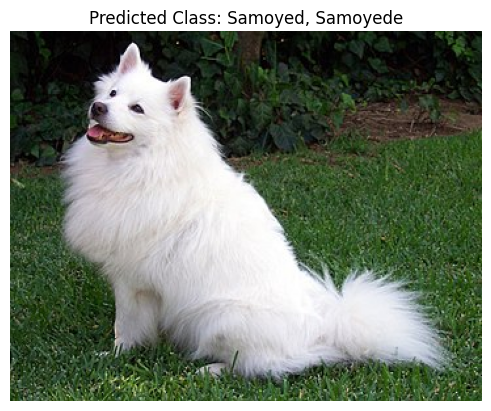

In [11]:
# Display the image
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()